___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors with Python

You've been given a **classified dataset** from a company. They've hidden the feature column names but have given you the data and the target classes. 

We'll use KNN to create a model that directly predicts a class for a new data point based on the features.

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Get the Data

Set `index_col=0` to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data", index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
# Fit the scalar instance to your features

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
# Transform the features with 'fitted' scalar

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
# View 'scaled' values in original DataFrame 
df_scaled_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])

df_scaled_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
# Note that all values are quite similar now

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# You can pass the scaled_features or the DataFrame of scaled features

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model. Classification task means confusion matrix, accuracy, recall, classification report metrics etc.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
cm = confusion_matrix(y_test, pred)

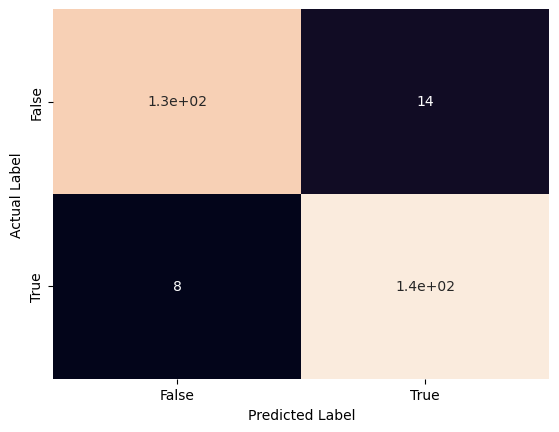

In [20]:
sns.heatmap(cm, annot=True, linecolor='black', xticklabels=['False', 'True'], yticklabels=['False', 'True'], cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       148
           1       0.91      0.95      0.93       152

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
# Results are pretty good - close accuracy, precision and recall, with well-balanced sample

## Choosing a K Value

Let's use the **elbow method** to pick a good K Value.

In [22]:
error_rate = []

# Metric is the average number of inaccurate predictions
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [23]:
# Much better to plot this out!
error_rate

[0.07333333333333333,
 0.07666666666666666,
 0.056666666666666664,
 0.05,
 0.06,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.04666666666666667,
 0.043333333333333335,
 0.04,
 0.043333333333333335,
 0.03666666666666667,
 0.043333333333333335,
 0.04,
 0.05,
 0.04666666666666667,
 0.05,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05333333333333334,
 0.04666666666666667,
 0.05333333333333334,
 0.05,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.05,
 0.05333333333333334,
 0.043333333333333335,
 0.05,
 0.043333333333333335,
 0.043333333333333335]

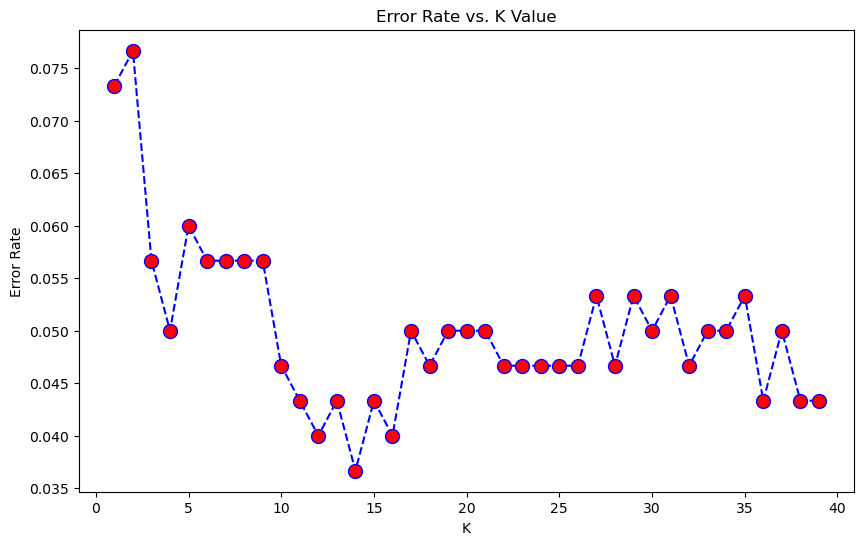

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

Here we can see that that approx K = 14, the error rate is at its lowest. Then the error rate tends to hover between 0.045-0.055 after k=22.  You can confirm the lowest error rate value by combining the k-values with the error rates into a DataFrame:

In [26]:
cols_dict = {'K-value': range(1, 40), 'Error Rate': error_rate}

In [27]:
df_errors = pd.DataFrame(cols_dict).set_index('K-value').sort_index(ascending=False)

In [32]:
df_errors.idxmin()

Error Rate    14
dtype: int64

Let's re-train the model with K = 14 and check the classification report. First do a quick comparison with k=1:

In [33]:
# K = 1 (same results as above)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[134  14]
 [  8 144]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       148
           1       0.91      0.95      0.93       152

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [34]:
# K = 14 (approx. 2-3% improvement in performance)

knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=14


[[137  11]
 [  0 152]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.96       148
           1       0.93      1.00      0.97       152

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!